<a href="https://colab.research.google.com/github/rohitraj1234/Machine-Learning-Projects/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing Kaggle libraries**

In [1]:
pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d jhskaggle/diabetescsv

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 15.4MB/s]


In [4]:
from zipfile import ZipFile
dataset='/content/diabetescsv.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


**Import Libraries**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

**Read data from csv**

In [6]:
dataset_dia=pd.read_csv(dataset)

In [7]:
dataset_dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Data Cleaning**

In [8]:
dataset_dia.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
dataset_dia.drop('Pregnancies',axis=1,inplace=True)

In [10]:
dataset_dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [11]:
dataset_dia.nunique()

Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [12]:
dataset_dia.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
dataset_dia.groupby('Outcome').mean()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,
0,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


**EDA**

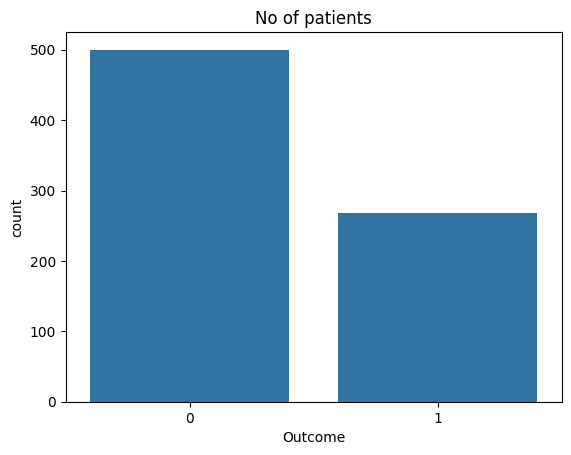

In [14]:
sns.countplot(x='Outcome',data=dataset_dia)
plt.title("No of patients")
plt.show()

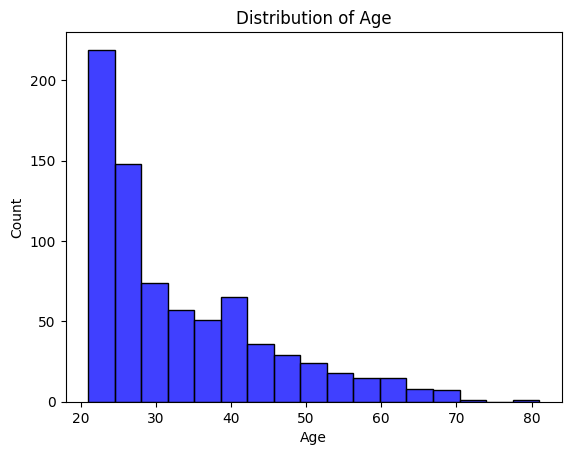

In [15]:
sns.histplot(x='Age',data=dataset_dia,color='blue')
plt.title("Distribution of Age")
plt.show()

**Seperating into data and labels**

In [16]:
X=dataset_dia.drop(columns='Outcome',axis=1)
y=dataset_dia['Outcome']

In [17]:
print(X)
print(y)

     Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        148             72             35        0  33.6   
1         85             66             29        0  26.6   
2        183             64              0        0  23.3   
3         89             66             23       94  28.1   
4        137             40             35      168  43.1   
..       ...            ...            ...      ...   ...   
763      101             76             48      180  32.9   
764      122             70             27        0  36.8   
765      121             72             23      112  26.2   
766      126             60              0        0  30.1   
767       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763     

**Standardizing the data**

In [18]:
Scaler=StandardScaler()

In [19]:
Scaler.fit(X)

StandardScaler()

In [20]:
Standardized_dataset=Scaler.transform(X)

In [21]:
print(Standardized_dataset)

[[ 0.84832379  0.14964075  0.90726993 ...  0.20401277  0.46849198
   1.4259954 ]
 [-1.12339636 -0.16054575  0.53090156 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.94372388 -0.26394125 -1.28821221 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.00330087  0.14964075  0.15453319 ... -0.73518964 -0.68519336
  -0.27575966]
 [ 0.1597866  -0.47073225 -1.28821221 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.8730192   0.04624525  0.65635768 ... -0.20212881 -0.47378505
  -0.87137393]]


In [22]:
X=Standardized_dataset
y=dataset_dia['Outcome']

**Train Test Split**

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [24]:
print(y_train.shape)

(614,)


**Building the Model**

In [25]:
classifier=svm.SVC(kernel='linear')

In [26]:
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [27]:
X_train_predictions=classifier.predict(X_train)
Training_accuracy=accuracy_score(X_train_predictions,y_train)

In [28]:
print(Training_accuracy)

0.7801302931596091


In [29]:
X_test_predictions=classifier.predict(X_test)
Testiing_accuracy=accuracy_score(X_test_predictions,y_test)

In [30]:
print(Testiing_accuracy)

0.7792207792207793
